# Reading the data

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
path = 'stored_data_case.h5'

In [3]:
def read_HDF_file(file_name, table):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
         return store[table]

In [4]:
df = read_HDF_file(path,'/transaction_and_locations')

In [5]:
df.head()

,parkmeter_id,user_type,payment_method,amount,duration_hours,parking_start,parking_end,parkmeter_address,arrondissement,system,residential_area,hourly_rate,parkmeter_coordinates
0,66391001,Rotatif,CB,2.4,2.00,2014-09-09 14:02:44,2014-09-09 16:02:44,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"
1,66391001,Rotatif,Paris Carte,0.3,0.25,2014-02-09 14:18:09,2014-02-09 14:33:09,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"
2084,66391001,Rotatif,CB,0.6,0.50,2014-05-09 18:55:21,2014-05-09 19:25:21,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"
2085,66391001,Rotatif,CB,0.9,0.75,2014-08-09 16:30:32,2014-08-09 17:15:32,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"
2086,66391001,Rotatif,Paris Carte,0.3,0.25,2014-01-09 18:40:25,2014-01-09 18:55:25,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"


# Demand exploration

In [6]:
df_demand = df[['parkmeter_id', 'parking_start', 'parking_end', 'residential_area']].copy()
df_demand['year'] = [time.year for time in df_demand['parking_start']]
df_temp = df_demand.copy()
df_temp['start_date'] = [time.strftime("%Y-%m-%d") for time in df_temp['parking_start']]
df_temp['end_date'] = [time.strftime("%Y-%m-%d") for time in df_temp['parking_end']]

#df_temp.to_csv('csv/df_to_group.csv') # 2GB !! 
#df_temp = pd.read_csv('df_to_group.csv') 

## *Demand: Turnover*

In [7]:
df_temp.head()

,parkmeter_id,parking_start,parking_end,residential_area,year,start_date,end_date
0,66391001,2014-09-09 14:02:44,2014-09-09 16:02:44,16Z,2014,2014-09-09,2014-09-09
1,66391001,2014-02-09 14:18:09,2014-02-09 14:33:09,16Z,2014,2014-02-09,2014-02-09
2084,66391001,2014-05-09 18:55:21,2014-05-09 19:25:21,16Z,2014,2014-05-09,2014-05-09
2085,66391001,2014-08-09 16:30:32,2014-08-09 17:15:32,16Z,2014,2014-08-09,2014-08-09
2086,66391001,2014-01-09 18:40:25,2014-01-09 18:55:25,16Z,2014,2014-01-09,2014-01-09


In [13]:
# start on any day
df_start = df_temp.groupby(['residential_area','parkmeter_id','start_date'], as_index = False)['parking_start'].count()
df_start = df_start.groupby(['residential_area','parkmeter_id'], as_index = False)['parking_start'].mean()
df_start = df_start.groupby('residential_area', as_index = False)['parking_start'].sum()
df_start.head()

,residential_area,parking_start
0,10E,578.023403
1,10F,543.834036
2,10G,646.885189
3,11E,461.654060
4,11F,479.944423


In [12]:
# end on any day
df_end = df_temp.groupby(['residential_area','parkmeter_id','end_date'], as_index = False)['parking_end'].count()
df_end = df_end.groupby(['residential_area','parkmeter_id'], as_index = False)['parking_end'].mean()
df_end = df_end.groupby('residential_area', as_index = False)['parking_end'].sum()
df_end.head()

,residential_area,parking_end
0,10E,766.181709
1,10F,696.147802
2,10G,826.836499
3,11E,579.774999
4,11F,622.680651


In [15]:
# turnover of the average 
# computing the average turnover takes too much space 
df = df_start.merge(df_end, on = ['residential_area'])
df['turnover'] = df['parking_end'] - df['parking_start']
df.head()

,residential_area,parking_start,parking_end
0,10E,578.023403,766.181709
1,10F,543.834036,696.147802
2,10G,646.885189,826.836499
3,11E,461.654060,579.774999
4,11F,479.944423,622.680651


/Users/louislimnavong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


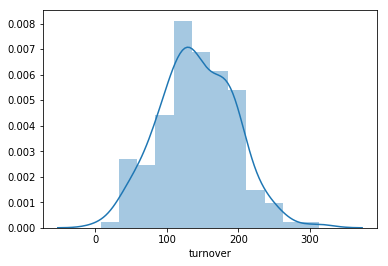

In [17]:
x = df['turnover']
sns.distplot(x)
plt.show()

In [18]:
df.to_excel('tables/df_turnover.xlsx')

In [19]:
df.to_csv('csv/df_turnover.csv')